In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import numpy as np
import requests
import time
import png

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

620

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
City_Name_ls = []
City_Number_ls = []
Temperature_ls = []
Humidity_ls = []
Cloudiness_ls = []
Wind_Speed_ls = []
Latitude_ls = []
Longitude_ls = []

print("Begining data retrieval...")
print("--------------------------")
counter = 1
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&q={city}&units={units}"

for city in cities:
    print(f"Processing {city} # {counter}")
    print(query_url)
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        City_Name_ls.append(weather_json["name"])
        City_Number_ls.append(weather_json["id"])
        Temperature_ls.append(weather_json['main']['temp'])
        Humidity_ls.append(weather_json['main']['humidity'])
        Cloudiness_ls.append(weather_json["clouds"]["all"])
        Wind_Speed_ls.append(weather_json["wind"]["speed"])
        Latitude_ls.append(weather_json['coord']['lat'])
        Longitude_ls.append(weather_json['coord']['lon'])
    except KeyError:
        print("City Doesn't Exist")
        continue
    counter = counter + 1
print("City Weather Data Retrieval Complete!")

Begining data retrieval...
--------------------------
Processing salinas # 1
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=faanui&units=imperial
Processing souillac # 2
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=salinas&units=imperial
Processing butaritari # 3
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=souillac&units=imperial
Processing mataura # 4
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=butaritari&units=imperial
Processing punta arenas # 5
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=mataura&units=imperial
Processing srednekolymsk # 6
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=punta arenas&units=imperial
Processing mar del plata # 7
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=sr

Processing vestmannaeyjar # 54
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=bacolod&units=imperial
Processing leningradskiy # 55
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=vestmannaeyjar&units=imperial
Processing kapaa # 56
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=leningradskiy&units=imperial
Processing ushuaia # 57
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=kapaa&units=imperial
Processing pacific grove # 58
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=ushuaia&units=imperial
Processing victoria # 59
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=pacific grove&units=imperial
Processing atuona # 60
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=victoria&units=imperial
Processing skibberee

Processing zholymbet # 107
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=faanui&units=imperial
Processing poum # 108
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=zholymbet&units=imperial
Processing belushya guba # 109
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=poum&units=imperial
City Doesn't Exist
Processing chapais # 109
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=belushya guba&units=imperial
Processing burnie # 110
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=chapais&units=imperial
Processing anchorage # 111
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=burnie&units=imperial
Processing upernavik # 112
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=anchorage&units=imperial
Processing mehta

Processing staryy nadym # 160
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=yelizovo&units=imperial
Processing komsomolskiy # 161
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=staryy nadym&units=imperial
Processing fairfield # 162
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=komsomolskiy&units=imperial
Processing carutapera # 163
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=fairfield&units=imperial
Processing bengkulu # 164
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=carutapera&units=imperial
City Doesn't Exist
Processing portland # 164
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=bengkulu&units=imperial
Processing ciudad ojeda # 165
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=portland&unit

City Doesn't Exist
Processing tuatapere # 210
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=kamenskoye&units=imperial
Processing vao # 211
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=tuatapere&units=imperial
Processing antsohihy # 212
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=vao&units=imperial
Processing pedernales # 213
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=antsohihy&units=imperial
Processing roma # 214
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=pedernales&units=imperial
Processing nanortalik # 215
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=roma&units=imperial
Processing kiama # 216
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=nanortalik&units=imperial
Processing adrar # 217

Processing acarau # 262
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=berezovyy&units=imperial
City Doesn't Exist
Processing mabamba # 262
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=acarau&units=imperial
Processing quatre cocos # 263
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=mabamba&units=imperial
Processing gorno-chuyskiy # 264
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=quatre cocos&units=imperial
City Doesn't Exist
Processing harper # 264
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=gorno-chuyskiy&units=imperial
Processing laguna # 265
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=harper&units=imperial
Processing liverpool # 266
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=laguna&uni

Processing matara # 315
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=san luis&units=imperial
Processing longyearbyen # 316
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=matara&units=imperial
Processing whitehorse # 317
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=longyearbyen&units=imperial
Processing tumannyy # 318
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=whitehorse&units=imperial
City Doesn't Exist
Processing nguiu # 318
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=tumannyy&units=imperial
City Doesn't Exist
Processing lircay # 318
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=nguiu&units=imperial
Processing worcester # 319
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=lircay&units=imperi

Processing nouakchott # 368
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=xochihuehuetlan&units=imperial
Processing boda # 369
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=nouakchott&units=imperial
Processing vardo # 370
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=boda&units=imperial
Processing ushirombo # 371
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=vardo&units=imperial
Processing bodden town # 372
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=ushirombo&units=imperial
Processing praya # 373
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=bodden town&units=imperial
Processing umzimvubu # 374
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=praya&units=imperial
City Doesn't Exist
Processing acaj

Processing paciran # 423
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=brae&units=imperial
Processing geraldton # 424
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=paciran&units=imperial
Processing nuoro # 425
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=geraldton&units=imperial
Processing filingue # 426
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=nuoro&units=imperial
Processing coquimbo # 427
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=filingue&units=imperial
Processing mora # 428
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=coquimbo&units=imperial
Processing deputatskiy # 429
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=mora&units=imperial
Processing susurluk # 430
http://api.openweatherm

Processing ilebo # 478
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=ukiah&units=imperial
Processing acopiara # 479
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=ilebo&units=imperial
Processing maceio # 480
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=acopiara&units=imperial
Processing inta # 481
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=maceio&units=imperial
Processing mount isa # 482
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=inta&units=imperial
Processing iracoubo # 483
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=mount isa&units=imperial
Processing bonavista # 484
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=iracoubo&units=imperial
Processing shawville # 485
http://api.openweathermap

Processing zelenoborskiy # 531
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=mana&units=imperial
Processing labutta # 532
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=zelenoborskiy&units=imperial
City Doesn't Exist
Processing ugoofaaru # 532
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=labutta&units=imperial
Processing feucht # 533
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=ugoofaaru&units=imperial
Processing talakan # 534
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=feucht&units=imperial
Processing manbij # 535
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=talakan&units=imperial
Processing saint-joseph # 536
http://api.openweathermap.org/data/2.5/weather?appid=8fd3302f72a45b360718b8edc9c76a6f&q=manbij&units=imperial
Processing path

In [4]:
Weather_dic = {"City Name":City_Name_ls, "ID":City_Number_ls, "Temperature(°F)":Temperature_ls, "Humidity(%)":Humidity_ls, "Cloudiness(%)":Cloudiness_ls, "Wind Speed(mph)":Wind_Speed_ls, "Latitude":Latitude_ls, "Longitude":Longitude_ls}

In [5]:
Weather_df = pd.DataFrame(Weather_dic)
Weather_df.to_csv("Weather Check API Data")

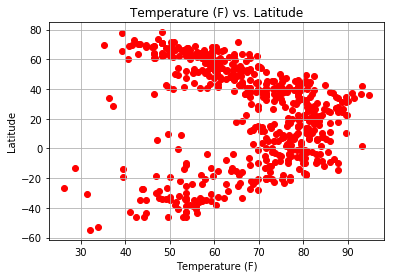

In [6]:
fig = plt.scatter(Temperature_ls, Latitude_ls, color="red")
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid()

plt.savefig('Temperature (F) vs. Latitude.png')
plt.show()

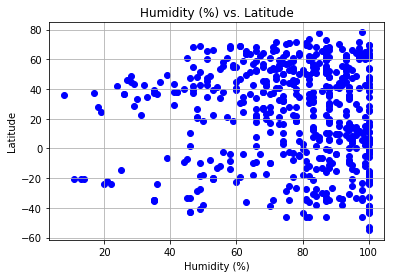

In [7]:
plot = plt.scatter(Humidity_ls, Latitude_ls, color="blue")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('Humidity (%) vs. Latitude.png')
plt.show()

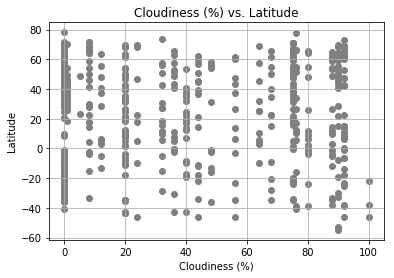

In [8]:
plot = plt.scatter(Cloudiness_ls, Latitude_ls, color="grey")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('Cloudiness (%) vs. Latitude.png')
plt.show()

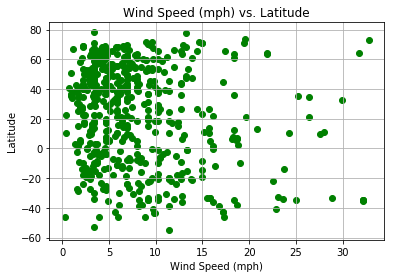

In [9]:
plot = plt.scatter(Wind_Speed_ls, Latitude_ls, color="green")
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('Wind Speed (mph) vs. Latitude.png')
plt.show()